## Imports

In [1]:
import tempfile
import os
import glob
from tqdm import tqdm

import tensorflow as tf
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers, models

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
  

## Reading the Data 

In [2]:
import pandas as pd

In [3]:
# Download class names
# wget "https://raw.githubusercontent.com/georgesung/traffic_sign_classification_german/master/signnames.csv" -outfile "signnames.csv"
classes = pd.read_csv('signnames.csv')
class_names = {}
for i, row in classes.iterrows():
    class_names[str(row[0])] = row[1]

In [61]:
def readTrainTestImages(trainpath,testpath):
    trainImages = []
    testImages = []
    trainimgfiles = glob.glob(trainpath + '/*.png')
    testimgfiles = glob.glob(testpath + '/*.png')
    for i in tqdm(range(len(trainimgfiles[:100]))):
        # Read Images
        print(trainimgfiles[i])
        img = mpimg.imread(trainimgfiles[i])   
        trainImages.append(img)        
    print('read ' + str(i) + " training images")   
    
    for i in tqdm(range(len(testimgfiles[:100]))):
        # Read Images
        print(testimgfiles[i])
        img = mpimg.imread(testimgfiles[i])   
        testImages.append(img)        
    print(f'read {i} test images')
            
    
    trainImages = np.array(trainImages, dtype='float32')
    testImages = np.array(testImages, dtype='float32')
    
    trainlabels = pd.read_csv(trainpath + '/trainlabels.csv',index_col=False)
    testlabels = pd.read_csv(testpath + '/testlabels.csv',index_col=False)
    trainlabels.drop(trainlabels.columns[0], axis=1, inplace=True)
    testlabels.drop(testlabels.columns[0], axis=1, inplace=True)
    
    return trainImages, trainlabels, testImages, testlabels
    

In [62]:
trainpath = './train-pngs'
testpath = './test-pngs'
trainData, trainLabels, testData, testLabels = readTrainTestImages(trainpath,testpath)

  1%|█▌                                                                                                                                                       | 1/100 [00:00<00:17,  5.64it/s]

./train-pngs\0.png
./train-pngs\1.png


  4%|██████                                                                                                                                                   | 4/100 [00:00<00:14,  6.71it/s]

./train-pngs\10.png
./train-pngs\100.png
./train-pngs\1000.png
./train-pngs\10000.png
./train-pngs\10001.png
./train-pngs\10002.png
./train-pngs\10003.png
./train-pngs\10004.png
./train-pngs\10005.png
./train-pngs\10006.png
./train-pngs\10007.png
./train-pngs\10008.png
./train-pngs\10009.png
./train-pngs\1001.png
./train-pngs\10010.png


 26%|███████████████████████████████████████▌                                                                                                                | 26/100 [00:00<00:07,  9.41it/s]

./train-pngs\10011.png
./train-pngs\10012.png
./train-pngs\10013.png
./train-pngs\10014.png
./train-pngs\10015.png
./train-pngs\10016.png
./train-pngs\10017.png
./train-pngs\10018.png
./train-pngs\10019.png
./train-pngs\1002.png
./train-pngs\10020.png
./train-pngs\10021.png


 15%|██████████████████████▋                                                                                                                                | 15/100 [00:00<00:00, 137.58it/s]

./train-pngs\10022.png
./train-pngs\10023.png
./train-pngs\10024.png
./train-pngs\10025.png
./train-pngs\10026.png
./train-pngs\10027.png
./train-pngs\10028.png
./train-pngs\10029.png
./train-pngs\1003.png
./train-pngs\10030.png
./train-pngs\10031.png
./train-pngs\10032.png
./train-pngs\10033.png
./train-pngs\10034.png
./train-pngs\10035.png
./train-pngs\10036.png
./train-pngs\10037.png
./train-pngs\10038.png
./train-pngs\10039.png
./train-pngs\1004.png
./train-pngs\10040.png
./train-pngs\10041.png
./train-pngs\10042.png
./train-pngs\10043.png
./train-pngs\10044.png
./train-pngs\10045.png
./train-pngs\10046.png
./train-pngs\10047.png
./train-pngs\10048.png
./train-pngs\10049.png
./train-pngs\1005.png
./train-pngs\10050.png
./train-pngs\10051.png
./train-pngs\10052.png
./train-pngs\10053.png
./train-pngs\10054.png
./train-pngs\10055.png
./train-pngs\10056.png
./train-pngs\10057.png
./train-pngs\10058.png
./train-pngs\10059.png
./train-pngs\1006.png
./train-pngs\10060.png
./train-pngs\10

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 327.32it/s]

./test-pngs\1002.png
./test-pngs\10020.png
./test-pngs\10021.png
./test-pngs\10022.png
./test-pngs\10023.png
./test-pngs\10024.png
./test-pngs\10025.png
./test-pngs\10026.png
./test-pngs\10027.png
./test-pngs\10028.png
./test-pngs\10029.png
./test-pngs\1003.png
./test-pngs\10030.png
./test-pngs\10031.png
./test-pngs\10032.png
./test-pngs\10033.png
./test-pngs\10034.png
./test-pngs\10035.png
./test-pngs\10036.png
./test-pngs\10037.png
./test-pngs\10038.png
./test-pngs\10039.png
./test-pngs\1004.png
./test-pngs\10040.png
./test-pngs\10041.png
./test-pngs\10042.png
./test-pngs\10043.png
./test-pngs\10044.png
./test-pngs\10045.png
./test-pngs\10046.png
./test-pngs\10047.png
./test-pngs\10048.png
./test-pngs\10049.png
./test-pngs\1005.png
./test-pngs\10050.png
./test-pngs\10051.png
./test-pngs\10052.png
./test-pngs\10053.png
./test-pngs\10054.png
./test-pngs\10055.png
./test-pngs\10056.png
./test-pngs\10057.png
./test-pngs\10058.png
./test-pngs\10059.png
./test-pngs\1006.png
./test-pngs\100

In [6]:
len(trainData),len(trainLabels), len(testData), len(testLabels)

(39209, 39209, 12630, 12630)

In [7]:
trainData.shape, trainLabels.shape

((39209, 40, 40, 3), (39209, 1))

In [8]:
trainLabels.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [9]:
testLabels.head()

,Class
0,16
1,1
2,38
3,33
4,11


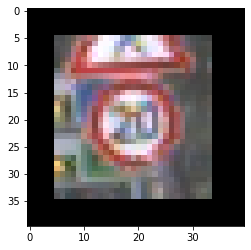

In [10]:
plt.imshow(trainData[0])

In [11]:
testLabels.iloc[42]['Class']

18

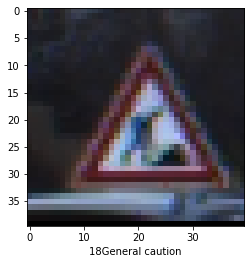

In [12]:
plt.xlabel(str(testLabels.iloc[42]['Class']) + str(class_names[str(testLabels.iloc[42]['Class'])]))
plt.imshow(testData[42])

### plot a few samples with labels

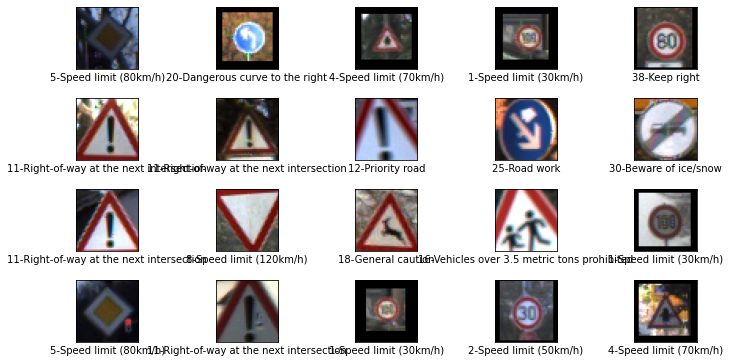

In [60]:
import random
plot = 1
plt.figure(figsize=(10,10))
for i in range(20):
    rand = random.randint(0,len(trainLabels))
    img = trainData[rand]
    label = trainLabels.iloc[rand]['Class']
    plt.subplot(8,5,plot)
    plt.tight_layout()
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img, cmap=plt.cm.binary)
    plt.xlabel(str(label) + "-" + str(class_names[str(label)]))
    plot += 1
plt.show()

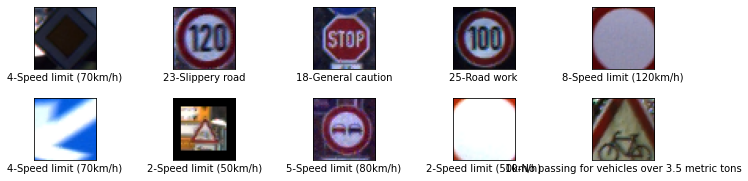

In [14]:
import random
plot = 1
plt.figure(figsize=(10,10))
for i in range(10):
    rand = random.randint(0,len(testLabels))
    img = testData[rand]
    label = testLabels.iloc[rand]['Class']
    plt.subplot(8,5,plot)
    plt.tight_layout()
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img, cmap=plt.cm.binary)
    plt.xlabel(str(label) + "-" + str(class_names[str(label)]))
    plot += 1
plt.show()

In [15]:
# myTrain = pd.DataFrame(trainData,columns=['Image'])

## Baseline CNN Model

In [16]:
tf.__version__

'2.3.0'

In [17]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [18]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [19]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPUs


In [36]:
IMG_SIZE=40
model = models.Sequential()
model.add(layers.Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(IMG_SIZE,IMG_SIZE,3)))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.BatchNormalization(center=True, scale=False))
# model.add(layers.GaussianNoise(0.5))
model.add(layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.BatchNormalization(center=True, scale=False))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization(center=True, scale=False))
model.add(layers.Dropout(0.50))
model.add(layers.Dense(43))

In [37]:
initial_learning_rate = 0.01
epochs = 10
decay = initial_learning_rate / 100

adamOpt = tf.keras.optimizers.Adam(learning_rate=0.01)

def lr_time_based_decay(epoch):
    return initial_learning_rate * 1 / (1 + decay * epoch)

lrdecay = keras.callbacks.LearningRateScheduler(lr_time_based_decay,verbose=1)

early_stop=keras.callbacks.EarlyStopping(monitor='loss',patience=10)

In [38]:
# trainTensor = tf.random.shuffle(tf.convert_to_tensor(trainData),seed=42)
# trainLabelTensor = tf.random.shuffle(tf.convert_to_tensor(trainLabels),seed=42)

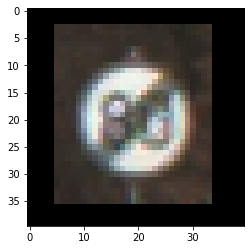

In [54]:
plt.imshow(trainData[104])

In [58]:
trainLabels.iloc[104]

Class    0
Name: 104, dtype: int64

In [59]:
class_names['0']

'Speed limit (20km/h)'

In [40]:
model.compile(optimizer=adamOpt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), #
              metrics=['accuracy'])

history = model.fit(trainTensor, trainLabelTensor, epochs=150, validation_split=0.2,verbose=1,callbacks=[early_stop,lrdecay]) #early_stop, callbacks=[early_stop,lrdecay]

Epoch 1/150
981/981 [==============================] - 9s 9ms/step - loss: 4.1956 - accuracy: 0.2560 - val_loss: 2.7080 - val_accuracy: 0.3602
Epoch 2/150
981/981 [==============================] - 9s 9ms/step - loss: 2.8624 - accuracy: 0.3612 - val_loss: 2.4804 - val_accuracy: 0.3905
Epoch 3/150
981/981 [==============================] - 9s 9ms/step - loss: 2.3196 - accuracy: 0.4220 - val_loss: 1.9755 - val_accuracy: 0.4621
Epoch 4/150
981/981 [==============================] - 9s 9ms/step - loss: 2.0101 - accuracy: 0.4829 - val_loss: 11.2678 - val_accuracy: 0.5305
Epoch 5/150
981/981 [==============================] - 9s 9ms/step - loss: 1.8629 - accuracy: 0.5153 - val_loss: 7.9783 - val_accuracy: 0.5320
Epoch 6/150
981/981 [==============================] - 10s 10ms/step - loss: 1.6829 - accuracy: 0.5541 - val_loss: 1.3849 - val_accuracy: 0.6264
Epoch 7/150
981/981 [==============================] - 10s 10ms/step - loss: 1.7142 - accuracy: 0.5709 - val_loss: 2.1529 - val_accuracy: 0